### Student Information
Name: 呂翊銘

Student ID: B10106021

GitHub ID: Justin21523

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

### Begin Assignment Here

#### Import necessary packages

In [88]:
import os
import pandas as pd
from sklearn.datasets import load_files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import helpers.data_mining_helpers as dmh

#### 1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__

##### Load the 20_newsgroups dataset

Since I can't obtain the dataset via the sklearn built-in method, and it keeps displaying "HTTP Error 403: Forbidden",   
I download the dataset manually from the website and use the sklearn.datasets.load_files function instead. 

In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# load the data from 20news-bydate-train sub-folder
data_dir = '20news-bydate-train'

twenty_train = load_files(data_dir, categories=categories,
                    shuffle=True, random_state=42, 
                     encoding='latin1', decode_error='ignore')

In [5]:
twenty_train.data[0]

'From: clipper@mccarthy.csd.uwo.ca (Khun Yee Fung)\nSubject: Re: looking for circle algorithm faster than Bresenhams\nOrganization: Department of Computer Science, The University of Western\n\tOntario, London, Ontario, Canada\nIn-Reply-To: graeme@labtam.labtam.oz.au\'s message of Wed, 14 Apr 1993 04:49:46 GMT\n\t<1993Apr13.025240.8884@nwnexus.WA.COM>\n\t<1993Apr14.044946.12144@labtam.labtam.oz.au>\nNntp-Posting-Host: mccarthy.csd.uwo.ca\nLines: 41\n\n>>>>> On Wed, 14 Apr 1993 04:49:46 GMT, graeme@labtam.labtam.oz.au (Graeme Gill) said:\n\nGraeme> \tYes, that\'s known as "Bresenhams Run Length Slice Algorithm for\nGraeme> Incremental lines". See Fundamental Algorithms for Computer Graphics,\nGraeme> Springer-Verlag, Berlin Heidelberg 1985.\n\n> I have tried to extrapolate this to circles but I can\'t figure out\n> how to determine the length of the slices. Any ideas?\n\nGraeme> \tHmm. I don\'t think I can help you with this, but you might\nGraeme> take a look at the following:\n\nGraeme

### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [6]:
for i in range(3):
    print("\n".join(twenty_train.data[i].split("\n")))
    print("------------------")

From: clipper@mccarthy.csd.uwo.ca (Khun Yee Fung)
Subject: Re: looking for circle algorithm faster than Bresenhams
Organization: Department of Computer Science, The University of Western
	Ontario, London, Ontario, Canada
In-Reply-To: graeme@labtam.labtam.oz.au's message of Wed, 14 Apr 1993 04:49:46 GMT
	<1993Apr13.025240.8884@nwnexus.WA.COM>
	<1993Apr14.044946.12144@labtam.labtam.oz.au>
Nntp-Posting-Host: mccarthy.csd.uwo.ca
Lines: 41

>>>>> On Wed, 14 Apr 1993 04:49:46 GMT, graeme@labtam.labtam.oz.au (Graeme Gill) said:

Graeme> 	Yes, that's known as "Bresenhams Run Length Slice Algorithm for
Graeme> Incremental lines". See Fundamental Algorithms for Computer Graphics,
Graeme> Springer-Verlag, Berlin Heidelberg 1985.

> I have tried to extrapolate this to circles but I can't figure out
> how to determine the length of the slices. Any ideas?

Graeme> 	Hmm. I don't think I can help you with this, but you might
Graeme> take a look at the following:

Graeme> 	"Double-Step Incremental Gene

##### Converting Dictionary into Pandas Dataframe and add additional 'category' column

In [9]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X

,text,category,category_name
0,From: clipper@mccarthy.csd.uwo.ca (Khun Yee Fu...,1,comp.graphics
1,From: jcopelan@nyx.cs.du.edu (The One and Only...,0,alt.atheism
2,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med
3,From: jchen@wind.bellcore.com (Jason Chen) Sub...,2,sci.med
4,From: cobb@alexia.lis.uiuc.edu (Mike Cobb) Sub...,0,alt.atheism
...,...,...,...
2252,From: klier@iscsvax.uni.edu Subject: Re: Modif...,2,sci.med
2253,From: rog@cdc.hp.com (Roger Haaheim) Subject: ...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med


### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [12]:
#Answer here
X[(X['category_name'] == 'alt.atheism') & (X.index % 2 == 0) ].head()

,text,category,category_name
4,From: cobb@alexia.lis.uiuc.edu (Mike Cobb) Sub...,0,alt.atheism
20,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
30,"From: ""Robert Knowles"" <p00261@psilink.com> Su...",0,alt.atheism
38,From: agrino@enkidu.mic.cl (Andres Grino Brand...,0,alt.atheism
60,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,0,alt.atheism


I queried the even rows of the data with 'alt.atheism' category name by combining conditional filtering and Boolean indexing.   
And then show the first 5 records.

### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [14]:
# Filter the DataFrame for records where the 'target_name' is 'sci.med'
sci_med_df = X.loc[X['category_name'] == 'sci.med']

# Select every 10th record using slicing and display the first 5 results
result = sci_med_df.iloc[::10].head(5)

result

,text,category,category_name
2,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med
46,From: Lawrence Curcio <lc2b+@andrew.cmu.edu> S...,2,sci.med
87,From: colby@oahu.cs.ucla.edu (Kenneth Colby) S...,2,sci.med
130,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
150,From: ritley@uimrl7.mrl.uiuc.edu () Subject: M...,2,sci.med


#### Check Missing Values

### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [16]:
def check_missing_cols(col):
    """ functions that check and verifies if there are missing values in each row of the dataframe """
    counter = 0
    for element in col:
        if element == True:
            counter+=1
    return counter

# axis = 1 to apply the function to columns
result = X.isnull().apply(lambda x: check_missing_cols(x), axis = 1)
result

0       0
1       0
2       0
3       0
4       0
       ..
2252    0
2253    0
2254    0
2255    0
2256    0
Length: 2257, dtype: int64

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [17]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [18]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

The issue here is that .isnull() did not work effectively because there are different representations of "missing" values in the missing_example column. 

The .isnull() function in Pandas only detects np.nan or None as missing values by default. However, in this dataset, the "missing" values include other representations:  

1. np.nan (interpreted as missing by .isnull())  
2. None (interpreted as missing by .isnull())  
3. The string 'NaN' (interpreted as a regular string and not considered missing by .isnull())  
4. An empty string '' (not considered missing by .isnull())  

This problem is common when working with messy data where different conventions are used to represent missing values. 
When .isnull() is applied, it will only mark rows with np.nan or None as missing, ignoring 'NaN' and ''.  

##### Alernative solution (include 'NaN', '', 'None' as missing values)

In [20]:
# Define a custom function to check for different representations of missing values
def is_missing(value):
    return pd.isnull(value) or value in ['NaN', '', 'None']

# Apply the function to create a mask for missing values
NA_df['is_missing'] = NA_df['missing_example'].apply(is_missing)

# Display the DataFrame with missing indicators
NA_df

,id,missing_example,is_missing
0,A,NaN,True
1,B,NaN,True
2,C,NaN,True
3,D,None,True
4,E,None,True
5,F,,True


#### Sampling

In [21]:
X_sample = X.sample(n=1000) #random state

In [23]:
len(X_sample)

1000

In [24]:
X_sample[0:4]

,text,category,category_name
478,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...,1,comp.graphics
1090,From: ingles@engin.umich.edu (Ray Ingles) Subj...,0,alt.atheism
1670,From: seth@north13.acpub.duke.edu (Seth Wander...,1,comp.graphics
1127,From: ferdinan@oeinck.waterland.wlink.nl (Ferd...,1,comp.graphics


In [25]:
X[0:4]

,text,category,category_name
0,From: clipper@mccarthy.csd.uwo.ca (Khun Yee Fu...,1,comp.graphics
1,From: jcopelan@nyx.cs.du.edu (The One and Only...,0,alt.atheism
2,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med
3,From: jchen@wind.bellcore.com (Jason Chen) Sub...,2,sci.med


### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

##### Answer:

The differences between the X and X_sample DataFrames primarily result from the sampling process.   

First, X_sample has a reduced number of rows (1,000) compared to the original 3,997 rows in X, indicating that it is a subset drawn from X. 

Additionally, X_sample retains the original row indices from X rather than using a new sequential index, suggesting that the sampling was done randomly without resetting the index. 

Despite these changes, both DataFrames maintain the same column structure (text, category, and category_name), with no alterations to column names or data types.  

#### visualize and analyze the disparity between the two datasets
We look at the distribution of categories in both the sample and original dataset

category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}, xlabel='category_name'>

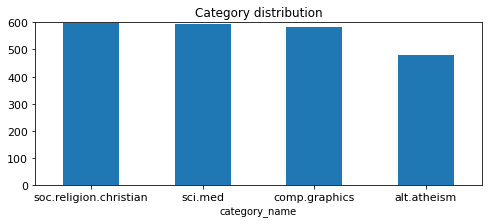

In [27]:
# distribution of categories for Original data
print(X['category_name'].value_counts())

# plot barchart for the distribution
X['category_name'].value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 600], # each category less than 600       
                                    rot = 0, fontsize = 11, figsize = (8,3))

distribution of categories for sampled data

category_name
soc.religion.christian    279
comp.graphics             266
sci.med                   258
alt.atheism               197
Name: count, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}, xlabel='category_name'>

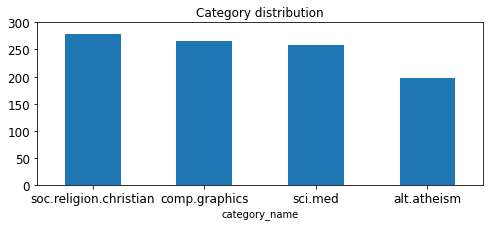

In [29]:
# # distribution of categories for original data
print(X_sample['category_name'].value_counts())

# plot barchart for X_sample
X_sample['category_name'].value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], # each category less than 300  
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

Calculate the maximum value in the category counts (distribution) with max()

<AxesSubplot:title={'center':'Category distribution'}, xlabel='category_name'>

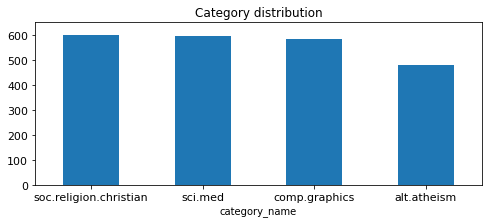

In [30]:
# Calculate the maximum value in the category counts
max_count = X['category_name'].value_counts().max()

# Plot the bar chart with dynamic ylim
X['category_name'].value_counts().plot(
    kind='bar',
    title='Category distribution',
    ylim=(0, max_count + 50),  # Add a small buffer above the max count for better visualization
    rot=0,
    fontsize=11,
    figsize=(8, 3)
)

ylim = (0, max_count + 50) dynamically adjusts the upper limit of the y-axis to slightly above the maximum count, allowing for a consistent and visually appealing plot

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

Calculate category counts for both datasets

In [34]:
# Calculate category counts for both datasets
X_counts = X['category_name'].value_counts()
X_sample_counts = X_sample['category_name'].value_counts()
print(X_counts)
print(X_sample_counts)

max_count = X['category_name'].value_counts().max()

category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64
category_name
soc.religion.christian    279
comp.graphics             266
sci.med                   258
alt.atheism               197
Name: count, dtype: int64


Combine counts into a DataFrame

In [37]:
# Combine counts into a DataFrame
comparison_df = pd.DataFrame({
    'X': X_counts,
    'X_sample': X_sample_counts
}).sort_values(by = ['X', 'X_sample'], ascending=False)

Plot the side-by-side bar chart

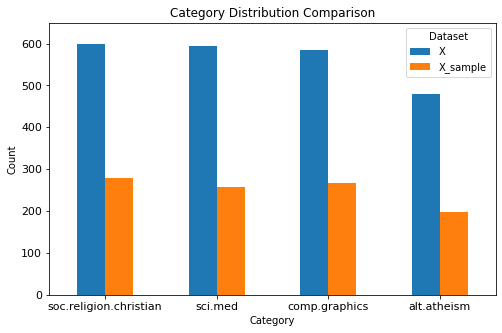

In [39]:
# Plot the side-by-side bar chart
comparison_df.plot(kind='bar', 
                   ylim=(0, max_count + 50),  # Add a small buffer above the max count for better visualization
                   rot=0,
                   fontsize=11,
                   figsize=(8, 5))

plt.title('Category Distribution Comparison')
plt.xlabel('Category')
plt.ylabel('Count')
plt.ylim(0, comparison_df.values.max() + 50)  # Set y-limit dynamically with some padding
plt.legend(title='Dataset')
plt.show()

The distribution of the categories for both datasets remain relatively the same, indicating a good sign of data representation.

#### Feature Creation and Feature subset selection

Transformed the text data into a **term-document matrix**.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [46]:
# the built-in, default tokenizer
analyze = count_vect.build_analyzer()

# first text of the record of our X
first_text = X['text'][0]
print(first_text)

#  turn the text document into a tokenized text using the default tokenizer
print(analyze(first_text))

From: clipper@mccarthy.csd.uwo.ca (Khun Yee Fung) Subject: Re: looking for circle algorithm faster than Bresenhams Organization: Department of Computer Science, The University of Western 	Ontario, London, Ontario, Canada In-Reply-To: graeme@labtam.labtam.oz.au's message of Wed, 14 Apr 1993 04:49:46 GMT 	<1993Apr13.025240.8884@nwnexus.WA.COM> 	<1993Apr14.044946.12144@labtam.labtam.oz.au> Nntp-Posting-Host: mccarthy.csd.uwo.ca Lines: 41  >>>>> On Wed, 14 Apr 1993 04:49:46 GMT, graeme@labtam.labtam.oz.au (Graeme Gill) said:  Graeme> 	Yes, that's known as "Bresenhams Run Length Slice Algorithm for Graeme> Incremental lines". See Fundamental Algorithms for Computer Graphics, Graeme> Springer-Verlag, Berlin Heidelberg 1985.  > I have tried to extrapolate this to circles but I can't figure out > how to determine the length of the slices. Any ideas?  Graeme> 	Hmm. I don't think I can help you with this, but you might Graeme> take a look at the following:  Graeme> 	"Double-Step Incremental Gene

The tokenization process removed stop words (e.g i, a, the), and create unigrams.

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [47]:
X_counts.shape

(2257, 35788)

In [79]:
# select the first 20 documents and 100 terms, and convert them from sparse array to a normal array
target_X_counts =  X_counts[:20, 0:100].toarray()

In [80]:
# find the indices where the element isn't zero
non_zero_indices = np.where(target_X_counts != 0)

non_zero_indices

(array([ 0, 10, 12], dtype=int64), array([98, 44,  0], dtype=int64))

It showed that the 98th, 44th, 0th term of this term-document matrix fo`r the 0th, 10th, 12th documents aren't non-zero.

In [72]:
print(target_X_counts[0, non_zero_indices[1][0]])

print(target_X_counts[10, non_zero_indices[1][1]])

print(target_X_counts[12, non_zero_indices[1][2]])

1
1
1


 Map indices to words using the vocabulary

In [81]:
# Map indices to words using the vocabulary
words = [count_vect.get_feature_names_out()[index] for index in non_zero_indices[1]] # non_zero_indices[1] for term indices

# Display the words
print("Words represented by non-0s in the first, 10th, 12th record respectively:", words)

Words represented by non-0s in the first, 10th, 12th record respectively: ['025240', '011720', '00']


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

Calculate term frequencies across all documents

In [82]:
# Calculate term frequencies across all documents
term_frequencies = X_counts.sum(axis=0).A1  # Convert to a 1D array
# get all the terms for this term-document matrix
vocab = count_vect.get_feature_names_out()

In [ ]:
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\b0979\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
# Create a DataFrame with terms and their frequencies
term_freq_df = pd.DataFrame({'term': vocab, 'frequency': term_frequencies})

n = 20  # Set the number of top terms to visualize
top_n_terms = term_freq_df.head(n)['term'].tolist()  # Get the top terms as a list

print(top_n_terms)

['00', '000', '0000', '0000001200', '000005102000', '0001', '000100255pixel', '00014', '000406', '0007', '000usd', '0010', '001004', '0010580b', '001125', '001200201pixel', '0014', '001642', '00196', '002']


I choose only the frist 20 terms.

In [91]:
# Get indices of the top terms in the vocabulary
top_n_indices = [count_vect.vocabulary_[term] for term in top_n_terms]

# Filter the document-term matrix to keep only these columns (first n terms)
X_top_terms = X_counts[:, top_n_indices]

Filter the document-term matrix to keep only these columns (first n terms)

In [93]:
m = 20  # Set the number of documents to visualize

# Sum the frequencies of top terms for each document and get top m documents
doc_frequencies = X_top_terms.sum(axis=1).A1  # Sum across terms for each document

top_m_doc_indices = doc_frequencies.argsort()[::-1][:m]  # Get indices of the top m documents

# Filter the matrix to only include these top documents
X_top_m_docs = X_top_terms[top_m_doc_indices, :]

I set only the top 20 documents with the highest frequencies of these terms for better visualization

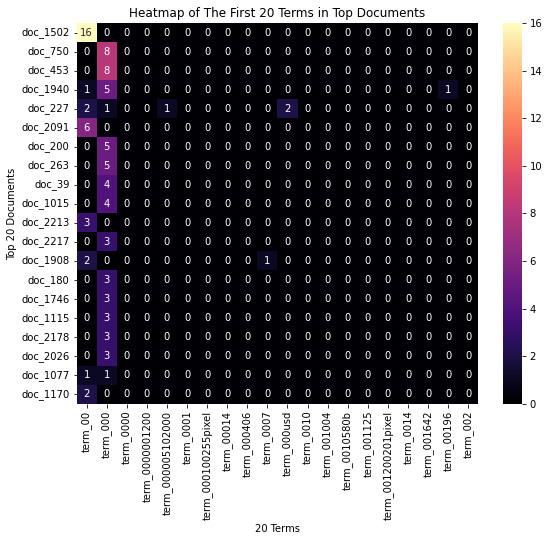

In [95]:
# first twenty features only
plot_x = ["term_"+str(i) for i in top_n_terms]
# obtain document index
plot_y = ["doc_"+ str(i) for i in top_m_doc_indices ]
# Convert the sparse matrix to a dense array for plotting
plot_z  = X_top_m_docs.toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

plt.subplots(figsize=(9, 7))
sns.heatmap(df_todraw,
                 cmap="magma", 
                 annot=True)

plt.title("Heatmap of The First 20 Terms in Top Documents")
plt.xlabel("20 Terms")
plt.ylabel("Top 20 Documents")
plt.show()

We can see some differences among the distribution of the 20 terms in these documents with the highest term frequency.  
However, since these 20 terms are just a series of the number characters, they're not the most typical terms to represent the meaning and context of these documents, and thus we still can't see a highly noticeable contrast.

#### Visualization of the term frequency

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [97]:
import plotly.express as px


# Create a DataFrame with terms and their frequencies
term_freq_df = pd.DataFrame({'term': vocab, 'frequency': term_frequencies})

# Plot the term frequency in Plotly
fig = px.bar(term_freq_df[:300], x='term', y='frequency', title="Term Frequencies",
             labels={'term': 'Term', 'frequency': 'Frequency'},
             color='frequency', color_continuous_scale='Agsunset')

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Terms',
    yaxis_title='Frequency',
    coloraxis_showscale=False
)

fig.show()


### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


##### Filter out rare terms

I filtered out rare and some non-common terms and retained only terms with 'frequency' >= 1000 
to reduce the size of the vocabulary.

In [103]:
# Filter out stop-words
filtered_term_freq_df = term_freq_df[(term_freq_df['frequency'] >= 1000)]
filtered_term_freq_df

,term,frequency
3958,about,2148
4720,all,2093
4808,also,1090
4938,an,2393
4992,and,13017
...,...,...
35157,with,3655
35312,would,2000
35350,writes,1645
35638,you,6157


C:\Users\b0979\AppData\Local\Temp\ipykernel_5820\3907201915.py:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 1.0, 'Filtered Term Frequencies')

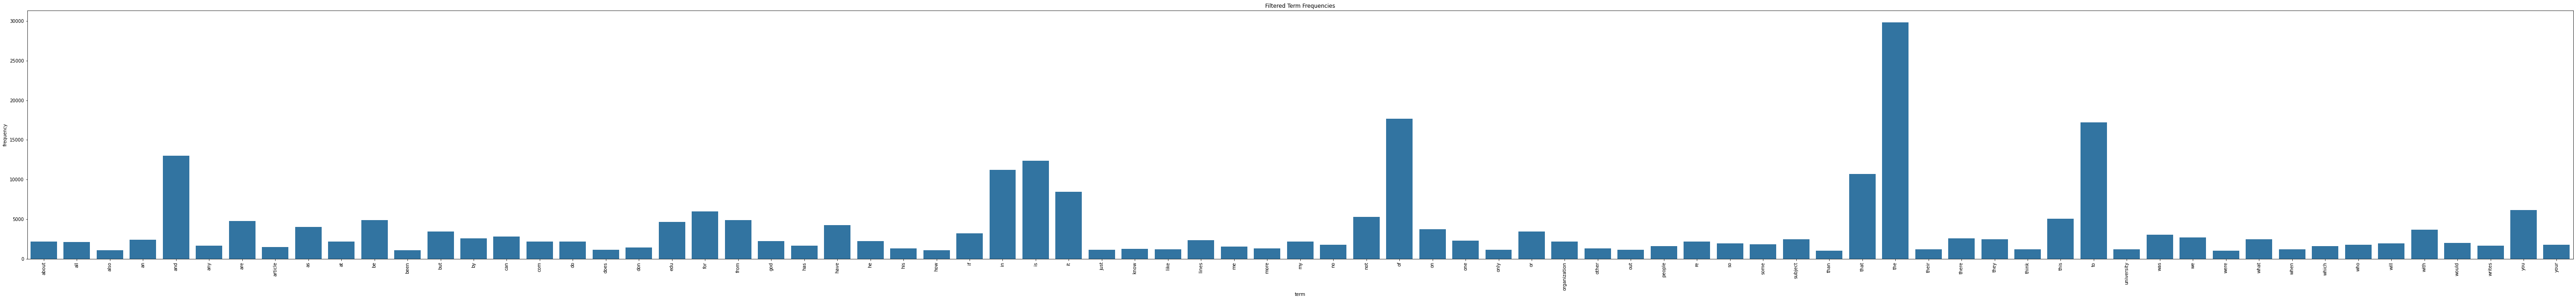

In [104]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(filtered_term_freq_df, x='term', y='frequency')
g.set_xticklabels(filtered_term_freq_df['term'], rotation = 90)

plt.title("Filtered Term Frequencies")

In [105]:
# Plot the term frequency in Plotly
fig = px.bar(filtered_term_freq_df, x='term', y='frequency', title="Filtered Term Frequencies",
             labels={'term': 'Term', 'frequency': 'Frequency'},
             color='frequency', color_continuous_scale='Agsunset')

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Terms',
    yaxis_title='Frequency',
    coloraxis_showscale=False
)

fig.show()

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

Sort by term frequency and get the top 100 terms

In [109]:
# Sort by frequency and get the top n terms
n = 100  # Number of top terms to visualize
top_n_df = term_freq_df.sort_values(by='frequency', ascending=False).head(n)

# Plot the term frequency in Plotly
fig = px.bar(top_n_df, x='term', y='frequency', title="Sorted Top Term Frequencies",
             labels={'term': 'Term', 'frequency': 'Frequency'},
             color='frequency', color_continuous_scale='Agsunset')

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Terms',
    yaxis_title='Frequency',
    coloraxis_showscale=False
)

fig.show()

C:\Users\b0979\AppData\Local\Temp\ipykernel_5820\1432121491.py:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 1.0, 'Sorted Term Frequencies')

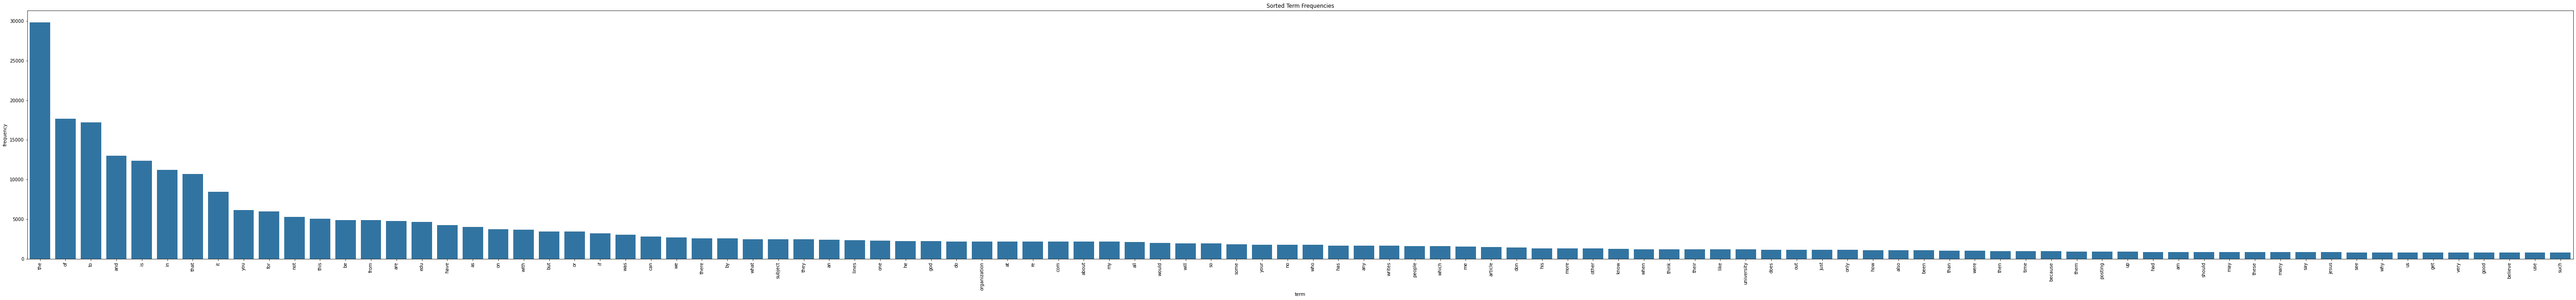

In [110]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(top_n_df, x='term', y='frequency')
g.set_xticklabels(top_n_df['term'], rotation = 90)

plt.title("Sorted Term Frequencies")

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [111]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

# Create a DataFrame with terms and their frequencies
log_term_freq_df = pd.DataFrame({'term': vocab, 'log frequency': term_frequencies_log})

# Sort by frequency and get the top n terms
log_top_n_df = log_term_freq_df.sort_values(by='log frequency', ascending=False).head(n)

# Plot the term frequency in Plotly
fig = px.bar(log_top_n_df, x='term', y='log frequency', title="Top Term Log Frequencies",
             labels={'term': 'Term', 'log frequency': 'Log Frequency'},
             color='log frequency', color_continuous_scale='Agsunset')

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Terms',
    yaxis_title='Log Frequency',
    coloraxis_showscale=False
)

fig.show()

The two bar charts provide different perspectives on term frequencies: one using absolute frequency and the other with log-transformed frequency.  

In the absolute frequency chart, the term "edu" dominates due to its exceptionally high count, causing other terms to appear much smaller and less distinct by comparison. This large disparity limits the ability to discern moderate-frequency terms, as they are visually overshadowed.  

In contrast, the log-transformed frequency chart compresses the range of frequencies, making mid-range terms like "cmu," "cs," "com," and "rutgers" more comparable to "edu." This transformation reduces the influence of outliers, providing a balanced view that emphasizes terms with moderate frequencies. As a result, contextually relevant but less frequent terms, such as "subject," "christian," and "cantaloupe," become more prominent, offering a clearer picture of the dataset’s thematic focus.  

Log transformation thus helps highlight important mid-frequency terms, reduces skew from high-frequency outliers, and enables a more interpretable visualization of term distributions. This view supports better identification of meaningful terms in context, giving insights into the dataset’s vocabulary without overwhelming dominance by a few highly frequent terms. Additionally, it can reveal nuanced patterns useful for topic modeling and content analysis, especially when examining terms across different categories.   

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

##### Create separate DataFrames for each category

In [112]:
#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

##### Create term-document frequency DataFrames for each category

In [113]:
# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

##### Define function to get the bottom 1% and top 5% words 

In [115]:
# Get the bottom 1% and top 5% words based on their sum across all documents
def get_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    return sorted_words.head(bottom_n), sorted_words.tail(top_n)


# Apply the filtering function to each category
filtered_top_term_document_dfs = {}
filtered_bottom_term_document_dfs = {}

for category in categories:
    filtered_bottom_term_document_dfs[category], filtered_top_term_document_dfs[category] = \
        get_top_bottom_words_by_sum(filt_term_document_dfs[category])

##### bottom 1% terms for each category

In [127]:
for category in categories:
    target_term_document_df = filtered_bottom_term_document_dfs[category].sort_values(ascending = True).head(100)
    term_freq_df = pd.DataFrame({'bottom_term': target_term_document_df.index, 
                                     'bottom_frequency': target_term_document_df.values})

    # Plot the term frequency in Plotly
    fig = px.bar(term_freq_df, x='bottom_term', y='bottom_frequency', title="Bottom 1% Term For {}".format(category),
                labels={'bottom_term': 'Bottom Term', 'bottom_frequency': 'Bottom Frequency'},
                color='bottom_frequency', color_continuous_scale='Agsunset')

    fig.update_layout(
        xaxis_tickangle=-45,
        xaxis_title='Bottom Terms',
        yaxis_title='Bottom Frequency',
        coloraxis_showscale=False
    )

    fig.show()

##### Top 5% terms for each category

In [128]:
for category in categories:
    target_term_document_df = filtered_top_term_document_dfs[category].sort_values(ascending = False).head(100)
    term_freq_df = pd.DataFrame({'top_term': target_term_document_df.index, 
                                     'top_frequency': target_term_document_df.values})

    # Plot the term frequency in Plotly
    fig = px.bar(term_freq_df, x='top_term', y='top_frequency', title="Top 1% Term For {}".format(category),
                labels={'top_term': 'Top Term', 'top_frequency': 'Top Frequency'},
                color='top_frequency', color_continuous_scale='Agsunset')

    fig.update_layout(
        xaxis_tickangle=-45,
        xaxis_title='Top Terms',
        yaxis_title='Top Frequency',
        coloraxis_showscale=False
    )

    fig.show()

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 10000
Runtime: 0.23200368881225586


In [ ]:
obj1.save('freq_patterns_sci_med_minSup9.txt') #save the patterns
frequentPatternsDF_sci_med

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. For this you can find the following google collabs for reference provided by their github repository here: [FAE Top-K](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/topk/FAE.ipynb) and [MaxFPGrowth](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/maximal/MaxFPGrowth.ipynb)

##### Execute FAE Top-K algorithm at different k values

In [131]:
from PAMI.frequentPattern.topk import FAE  as alg

fae_result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])

algorithm = 'FAE'  #specify the algorithm name
k_list = [500, 1000, 1500]

for k in k_list:
    obj3 = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=k, sep='\t')
    obj3.mine()
    #store the results in the data frame
    fae_result.loc[fae_result.shape[0]] = [algorithm, k, len(obj3.getPatterns()), obj3.getRuntime(), obj3.getMemoryRSS()]

 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.


In [132]:
fae_result

,algorithm,minSup,patterns,runtime,memory
0,FAE,500,500,17.638999,774963200
1,FAE,1000,1000,33.403557,775106560
2,FAE,1500,1500,84.981267,475250688


##### import the plot library

In [133]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### plot the number of patterns

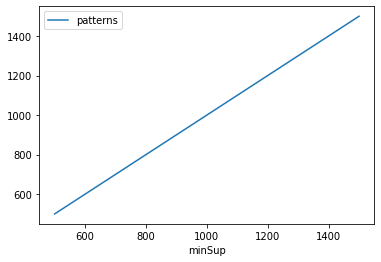

Graph for No Of Patterns is successfully generated!


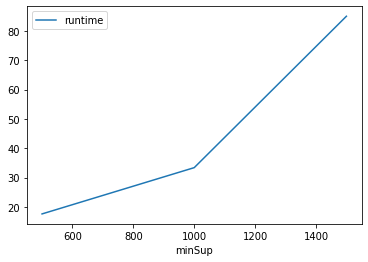

Graph for Runtime taken is successfully generated!


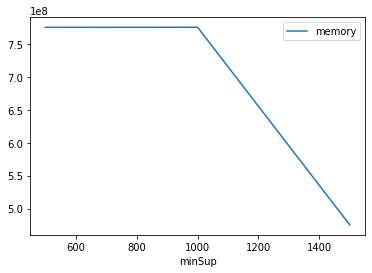

Graph for memory consumption is successfully generated!


In [136]:
ab = plt.plotGraphsFromDataFrame(fae_result)
ab.plotGraphsFromDataFrame() #drawPlots()

##### Execute MaxFPGrowth algorithm at different minSup values

In [137]:
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg #import the algorithm

minSupCount_list = [3, 6, 9]

fpgrowth_result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of MaxFPGrowth algorithm

for minSupCount in minSupCount_list:
    obj4 = alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSupCount, sep='\t')
    obj4.mine()
    #store the results in the data frame
    fpgrowth_result.loc[fpgrowth_result.shape[0]] = ['MaxFPGrowth', minSupCount, len(obj4.getPatterns()), obj4.getRuntime(), obj4.getMemoryRSS()]

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 


In [138]:
fpgrowth_result 

,algorithm,minSup,patterns,runtime,memory
0,MaxFPGrowth,3,2161,23.675000,1548816384
1,MaxFPGrowth,6,666,0.237004,1544863744
2,MaxFPGrowth,9,223,0.069998,1544863744


<AxesSubplot:xlabel='minSup'>

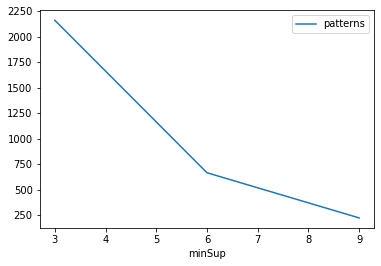

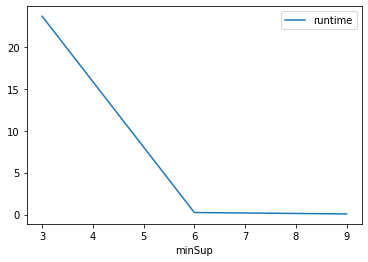

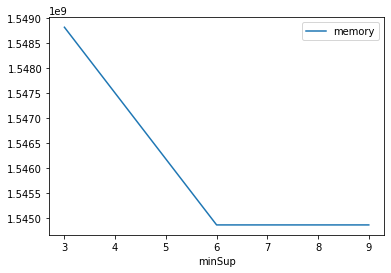

In [140]:
fpgrowth_result.plot(x='minSup', y='patterns', kind='line')
fpgrowth_result .plot(x='minSup', y='runtime', kind='line')
fpgrowth_result .plot(x='minSup', y='memory', kind='line')

#Graphs can be improved further by using additional packages, such as plotly and matplotlib

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism = obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4676
Runtime: 0.2749943733215332


In [ ]:
obj2.save('freq_patterns_alt_atheism_minSup9.txt') #save the patterns
frequentPatternsDF_alt_atheism

,Patterns,Support
0,choices,9
1,corp,9
2,hausmann,9
3,hausmann maddi,9
4,kids,9
...,...,...
4671,date,31
4672,date gmt,19
4673,stay,32
4674,snm6394,32


#### Dimensionality Reduction

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [143]:
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
X_counts.shape

(2257, 35788)

##### Applying dimensionality reduction (n_components=3) with the document-term frequency data

In [148]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=3).fit_transform(X_counts.toarray())
X_tsne_tdm = TSNE(n_components=3).fit_transform(X_counts.toarray())
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(X_counts.toarray())

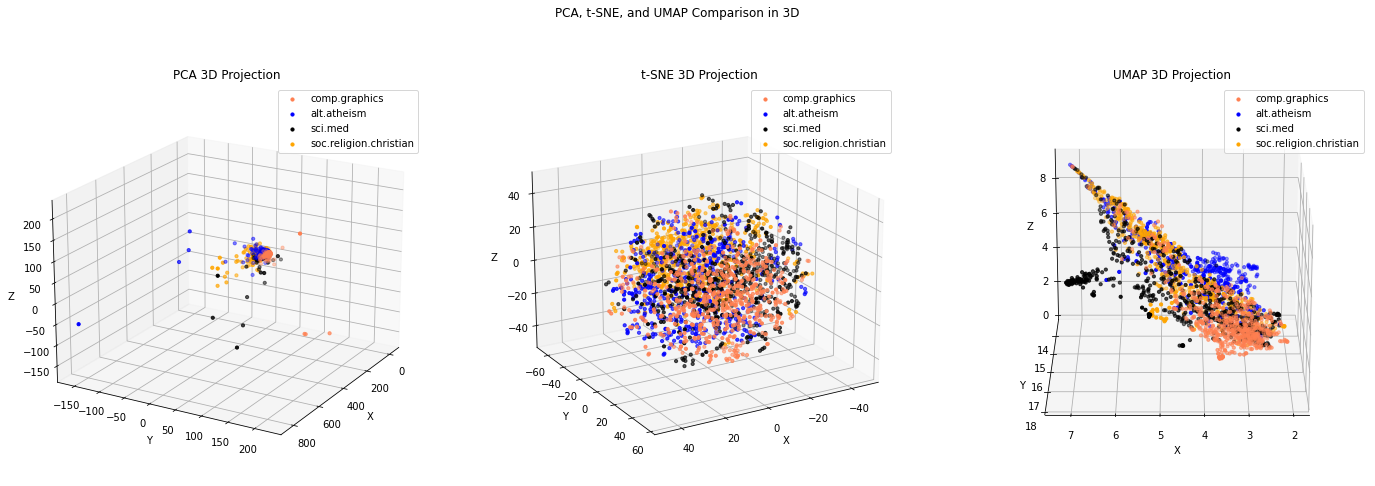

In [150]:
from mpl_toolkits.mplot3d import Axes3D

# Define color and categories (adjust according to your actual data)
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()  # Adjust this if you have specific categories

# Create a 1x3 subplot for each dimension reduction method
fig = plt.figure(figsize=(24, 8))
fig.suptitle('PCA, t-SNE, and UMAP Comparison in 3D')

# Function to plot a 3D scatter plot for each method
def plot_3d(ax, data, title):
    for c, category in zip(col, categories):
        indices = X['category_name'] == category
        ax.scatter(data[indices, 0], data[indices, 1], data[indices, 2], color=c, label=category, s=10)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Plot PCA
ax1 = fig.add_subplot(131, projection='3d')
plot_3d(ax1, X_pca_tdm, 'PCA 3D Projection')

# Plot t-SNE
ax2 = fig.add_subplot(132, projection='3d')
plot_3d(ax2, X_tsne_tdm, 't-SNE 3D Projection')

# Plot UMAP
ax3 = fig.add_subplot(133, projection='3d')
plot_3d(ax3, X_umap_tdm, 'UMAP 3D Projection')

# Rotate each subplot to give a better view
ax1.view_init(elev=20, azim=30)
ax2.view_init(elev=20, azim=60)
ax3.view_init(elev=20, azim=90)

plt.show()

Based on the 3D projections of PCA, t-SNE, and UMAP applied to the document-term matrix, we can see how each method captures the data’s structure differently:  

1. PCA shows a more linear spread with limited clustering, indicating that it captures the largest variance directions but struggles with non-linear separations. Categories are mixed, showing less distinction between groups.

2. t-SNE emphasizes local clustering effectively, resulting in tightly packed, distinct groups for each category. However, it distorts global distances, making it better for visualizing category separations rather than overall data structure.

3. UMAP balances both local and global structure, displaying elongated clusters that preserve neighborhood relations and some global patterns. It provides clear category separations with some overlap, offering insights into both within-cluster relationships and their broader spatial arrangement.

#### Discretization and Binarization


### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [153]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X['category_name'])

X['bin_category'] = mlb.transform(X['category_name']).tolist()

X['bin_category']

0       [0, 1, 0, 0]
1       [1, 0, 0, 0]
2       [0, 0, 1, 0]
3       [0, 0, 1, 0]
4       [1, 0, 0, 0]
            ...     
2252    [0, 0, 1, 0]
2253    [0, 0, 1, 0]
2254    [0, 0, 1, 0]
2255    [0, 0, 1, 0]
2256    [0, 1, 0, 0]
Name: bin_category, Length: 2257, dtype: object

It works.

LabelBinarizer was used to transform the category_name column into a binary format, where each unique category is represented as a separate column with binary values (1 for the presence of the category, 0 otherwise).  

The resulting binary columns represent each category in a one-hot encoded style, which is helpful for machine learning models that require numeric input.  

#### 2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
- Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    
- You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

##### Read the dataset

In [156]:
data = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
data

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


the *comment* data for the first three samples in the dataset. (See the above code for help)

In [157]:
for i in range(5):
    print(data['comment'][i])
    print("------------------")

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
------------------
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
------------------
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.
------------------
30 day leave from 1st tour in Viet Nam to convince my Mary Lou to "marry me" when I came back from my 2nd tour.  Now, 47 years later this December God g

#### Data Transformation

#### Converting Dictionary into Pandas Dataframe

In [169]:
X = pd.DataFrame()
X['sentiment'] = data['sentiment']
X['comment'] = data['comment']
X

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


#### Familiarizing yourself with the Data

In [11]:
# Filter the DataFrame for records where the 'target_name' is 'sci.med'
sci_med_df = X.loc[X['sentiment'] == 'not nostalgia']

# Select every 10th record using slicing and display the first 5 results
result = sci_med_df.head(5)

result

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
8,not nostalgia,Wherever you are you always in my heart
9,not nostalgia,Elvis will always be number one no one can com...
10,not nostalgia,ill bet if they begin to play this song on the...


Filter the DataFrame for records where the 'target_name' is 'sci.med'  

Select every 10th record using slicing and display the first 5 results  

#### Data Mining using Pandas

####  Missing Values

In [160]:
# check missing values
X.isnull()

,sentiment,comment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1495,False,False
1496,False,False
1497,False,False
1498,False,False


In [161]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

X.isnull().apply(lambda x: check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


---

Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  

In [162]:
X.isnull().apply(lambda x: x.sum(), axis = 1) # X.isnull().sum(axis = 1)

0       0
1       0
2       0
3       0
4       0
       ..
1495    0
1496    0
1497    0
1498    0
1499    0
Length: 1500, dtype: int64

#####  Define a custom function to check for different representations of missing values

In [170]:
# Define a custom function to check for different representations of missing values
def is_missing(value):
    return pd.isnull(value) or value in ['NaN', '', 'None']

missing_df = pd.DataFrame()
# Apply the function to create a mask for missing values
missing_df['sentiment_is_missing'] = X['sentiment'].apply(is_missing)
missing_df['comment_is_missing'] = X['comment'].apply(is_missing)

# Display the DataFrame with missing indicators
missing_df

,sentiment_is_missing,comment_is_missing
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1495,False,False
1496,False,False
1497,False,False
1498,False,False


In [171]:
missing_df.sum()

sentiment_is_missing    0
comment_is_missing      0
dtype: int64

####  Dealing with Duplicate Data

In [172]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

We can also check the sum of duplicate records by simply doing:

In [173]:
sum(X.duplicated())

1

In [174]:
X.drop_duplicates(inplace=True) 

In [175]:
len(X)

1499

#### Sampling

In [176]:
X_sample = X.sample(n=1000) #random state

In [177]:
len(X_sample)

1000

In [178]:
X_sample.head()

,sentiment,comment
441,not nostalgia,I know the songs good but please don???t like ...
10,not nostalgia,ill bet if they begin to play this song on the...
903,nostalgia,This brings back a good memory for me. I am 28...
1404,nostalgia,I remember listening this track down at the sk...
442,not nostalgia,I reckon he made a wish to be the best singer ...


##### Combine counts into a DataFrame

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<AxesSubplot:title={'center':'sentiment distribution'}, xlabel='sentiment'>

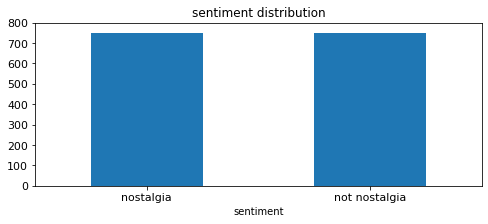

In [179]:
print(X['sentiment'].value_counts())

# Calculate the maximum value in the category counts
max_count = X['sentiment'].value_counts().max()

# Plot the bar chart with dynamic ylim
X['sentiment'].value_counts().plot(
    kind='bar',
    title='sentiment distribution',
    ylim=(0, max_count + 50),  # Add a small buffer above the max count for better visualization
    rot=0,
    fontsize=11,
    figsize=(8, 3)
)

'nostalgia' and 'not nostalgia' have almost the same amout of data

##### Plot the side-by-side bar chart

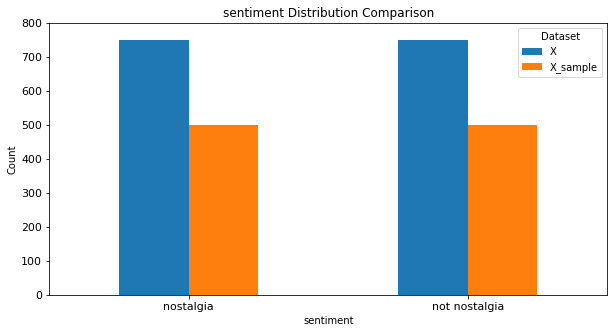

In [180]:
# Calculate category counts for both datasets
X_counts = X['sentiment'].value_counts()
X_sample_counts = X_sample['sentiment'].value_counts()

max_count = X['sentiment'].value_counts().max()

# Combine counts into a DataFrame
comparison_df = pd.DataFrame({
    'X': X_counts,
    'X_sample': X_sample_counts
})

# Plot the side-by-side bar chart
comparison_df.plot(kind='bar', 
                   ylim=(0, max_count + 50),  # Add a small buffer above the max count for better visualization
                   rot=0,
                   fontsize=11,
                   figsize=(10, 5))

plt.title('sentiment Distribution Comparison')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.ylim(0, comparison_df.values.max() + 50)  # Set y-limit dynamically with some padding
plt.legend(title='Dataset')
plt.show()

The distribution of the categories for both datasets remain relatively the same, indicating a good sign of data representation.

#### Feature Creation

In [181]:
import nltk

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

# takes a like a minute or two to process
X['unigrams'] = X['comment'].apply(lambda x: tokenize_text(x))

In [182]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

the tokenizer is not doing a great job, since many stop words aren't removed.

In [184]:
X[0:4]

,sentiment,comment,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


### Feature subset selection

generate a document-term matrix from the original dataset. 

In [185]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X['comment']) #learn the vocabulary and return document-term matrix

##### A closer look at the analyzer. 

In [186]:
analyze = count_vect.build_analyzer()

# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
first_text = X['comment'][0]
print(first_text)

print(analyze(first_text))

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
['he', 'was', 'singer', 'with', 'golden', 'voice', 'that', 'love', 'to', 'hear', 'all', 'the', 'time', 'was', 'his', 'great', 'fan', 'at', 'the', 'age', 'of', '16years', 'in', 'those', 'days', 'and', 'still', 'now', 'although', 'we', 'have', 'many', 'singers', 'now', 'but', 'can', 'vouch', 'for', 'jim', 'reeves', 'all', 'the', 'time', 'you', 'feel', 'relaxed', 'emotional', 'and', 'loving', 'thank', 'you', 'lord', 'for', 'his', 'life']


The tokenization process removed stop words (e.g i, a, the), and create unigrams.

##### A closer look at the term-document matrix.

In [187]:
# We can check the shape of this matrix by:
X_counts.shape

(1499, 3730)

the feature names of the vectorizer

In [188]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

A small portion/part of the term-document matrix

In [189]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]

plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

The heatmap version

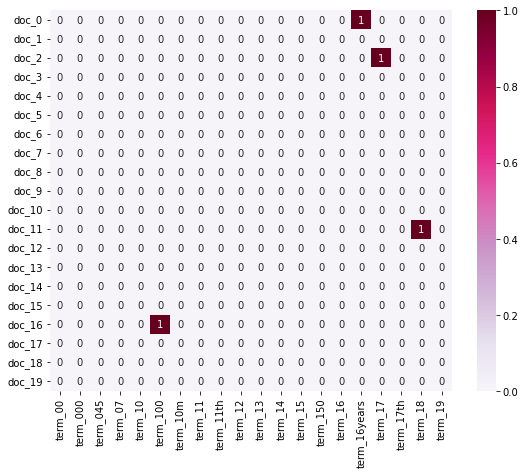

In [190]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### Attribute Transformation / Aggregation

In [191]:
# Calculate term frequencies across all documents
term_frequencies = X_counts.sum(axis=0).A1  # Convert to a 1D array

# get all terms of the term-document matrix
vocab = count_vect.get_feature_names_out()

#### Visualization of the term frequency (first 300 term)

C:\Users\b0979\AppData\Local\Temp\ipykernel_5820\1919152087.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

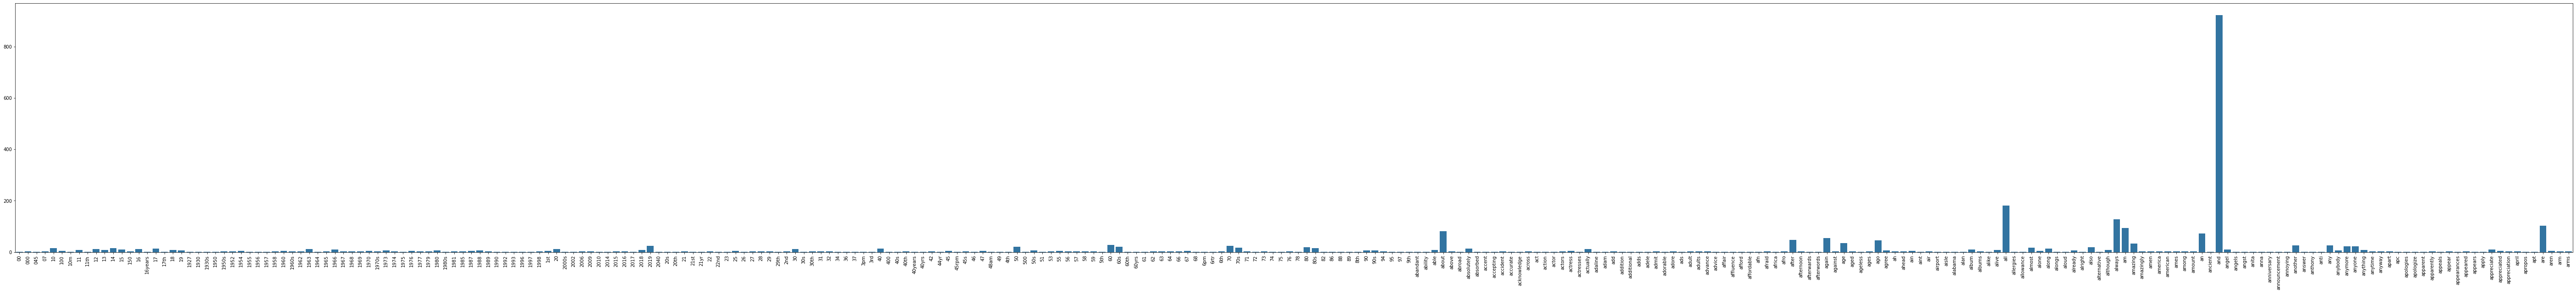

In [192]:
plt.subplots(figsize=(100, 10))

g = sns.barplot(x=vocab[:300], 
            y=term_frequencies[:300])

g.set_xticklabels(vocab[:300], rotation = 90)

#### Visualization of the term frequency

In [193]:
# Create a DataFrame with terms and their frequencies
term_freq_df = pd.DataFrame({'term': vocab, 'frequency': term_frequencies})

# Plot the term frequency in Plotly
fig = px.bar(term_freq_df[:300], x='term', y='frequency', title="Term Frequencies",
             labels={'term': 'Term', 'frequency': 'Frequency'},
             color='frequency', color_continuous_scale='Agsunset')

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Terms',
    yaxis_title='Frequency',
    coloraxis_showscale=False
)

fig.show()

##### Visualization (Sort by frequency and get the top n terms)

In [55]:
# Sort by frequency and get the top n terms
n = 20  # Number of top terms to visualize
top_n_df = term_freq_df.sort_values(by='frequency', ascending=False).head(n)

# Plot the term frequency in Plotly
fig = px.bar(top_n_df, x='term', y='frequency', title="Top Term Frequencies",
             labels={'term': 'Term', 'frequency': 'Frequency'},
             color='frequency', color_continuous_scale='Agsunset')

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Terms',
    yaxis_title='Frequency',
    coloraxis_showscale=False
)

fig.show()

The most frequent words are basically the common stop words like "the", "this", "and".

##### Visualize log distribution

C:\Users\b0979\AppData\Local\Temp\ipykernel_5820\3129008606.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

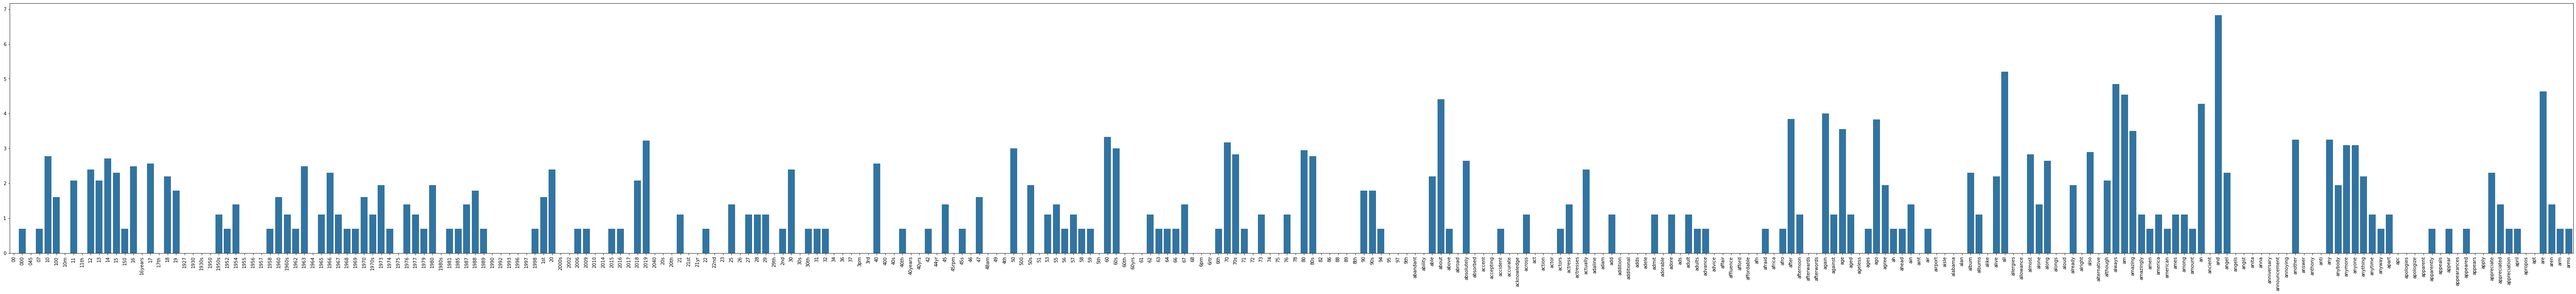

In [194]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))

g = sns.barplot(x=vocab[:300],
                y=term_frequencies_log[:300])

g.set_xticklabels(vocab[:300], rotation = 90)

Besides observing a complete transformation on the disrtibution, notice the scale on the y-axis. The log distribution in our unsorted example has no meaning.

In [195]:
# Create a DataFrame with terms and their frequencies
term_freq_df = pd.DataFrame({'term': vocab, 'log frequency': term_frequencies_log})

# Sort by frequency and get the top n terms
n = 20  # Number of top terms to visualize
top_n_df = term_freq_df.sort_values(by='log frequency', ascending=False).head(n)

# Plot the term frequency in Plotly
fig = px.bar(top_n_df, x='term', y='log frequency', title="Top Term Log Frequencies",
             labels={'term': 'Term', 'log frequency': 'Log Frequency'},
             color='log frequency', color_continuous_scale='Agsunset')

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Terms',
    yaxis_title='Log Frequency',
    coloraxis_showscale=False
)

fig.show()

####  Finding frequent patterns

##### Create separate DataFrames for each category

In [196]:
#Create separate DataFrames for each sentiment
sentiments = X['sentiment'].unique()  # Get unique sentiment labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each sentiment

for sentiment in sentiments:
    # Filter the original DataFrame by category
    sentiment_dfs[sentiment] = X[X['sentiment'] == sentiment].copy()

##### Create term-document frequency DataFrames for each category

In [198]:
# Function to create term-document frequency DataFrame for each sentiment
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the comment data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
sent_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for sentiment in sentiments:
    sent_term_document_dfs[sentiment] = create_term_document_df(sentiment_dfs[sentiment])

In [199]:
sentiments

array(['not nostalgia', 'nostalgia'], dtype=object)

#### term-document matrix for 'not nostalgia' 

In [200]:
sentiment = 'not nostalgia' 
print(f"Term-Document Frequency DataFrame for Sentiment {sentiment}:")

sent_term_document_dfs[sentiment]

Term-Document Frequency DataFrame for Sentiment not nostalgia:


,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### term-document matrix for 'nostalgia' 

In [201]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
sentiment = 'nostalgia' 
print(f"Term-Document Frequency DataFrame for Sentiment {sentiment}:")

sent_term_document_dfs[sentiment]

Term-Document Frequency DataFrame for Sentiment nostalgia:


,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
 # Sum over all documents to get total frequency for each word
sentiment = 'nostalgia' 
print(f"Term-Document Frequency DataFrame for Sentiment {sentiment}:")
nostalgia_word_counts = sent_term_document_dfs[sentiment].sum(axis=0).to_numpy()

 # Sum over all documents to get total frequency for each word
sentiment = 'not nostalgia' 
print(f"Term-Document Frequency DataFrame for Sentiment {sentiment}:")
not_nostalgia_word_counts = sent_term_document_dfs[sentiment].sum(axis=0).to_numpy()

Term-Document Frequency DataFrame for Sentiment nostalgia:
Term-Document Frequency DataFrame for Sentiment not nostalgia:


In [204]:
nostalgia_word_counts.max()

643

In [205]:
not_nostalgia_word_counts.max()

708

#### Visuzlie term frequency distribution for the two sentiments

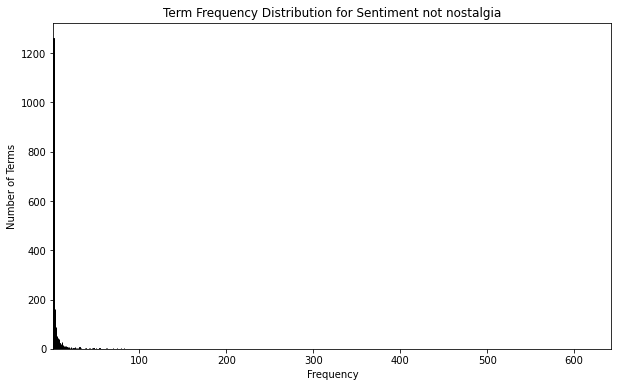

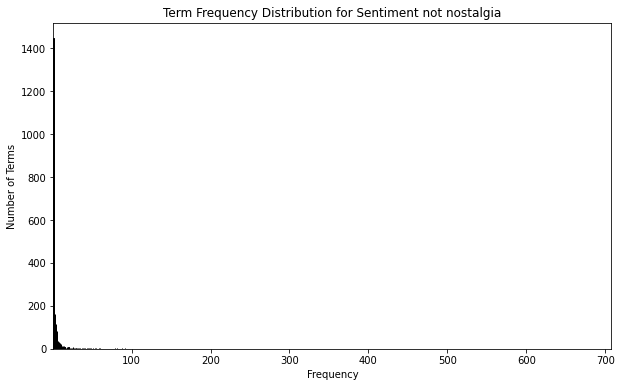

In [76]:
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(nostalgia_word_counts , bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Sentiment {sentiment}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, nostalgia_word_counts.max())
plt.show()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(not_nostalgia_word_counts , bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Sentiment {sentiment}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, not_nostalgia_word_counts.max())
plt.show()

##### Remove the **bottom 1%** of the least frequent words and the **top 5%** of the most frequent ones.

In [209]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)


term_document_dfs = {}  

for sentiment in sentiments:
    print(f'\nFor sentimment {sentiment} we filter the following words:')
    term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(sent_term_document_dfs[sentiment])



For sentimment not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
got         23
amazing     23
first       23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For sentimment nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row     

In [210]:
sentiment = 'nostalgia'
# Example: Display the filtered DataFrame for one of the sentiment
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiment}:")
term_document_dfs[sentiment]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


,07,10,11,11th,12,13,14,15,16,17,...,yo,yokel,younger,youngster,your,yours,youth,youthful,youtube,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Vocabulary size: 2602 -> 2159

In [208]:
sentiment = 'not nostalgia'

# Example: Display the filtered DataFrame for one of the sentiment
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiment}:")
term_document_dfs[sentiment]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,000,045,10,100,10m,11,12,14,15,150,...,younger,youngest,youngsters,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Vocabulary size: 2295 -> 2446

##### convert the dataframe into a transactional database with PAMI library

In [212]:
#from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    sentiment_safe = sentiment.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    obj = DF2DB(term_document_dfs[sentiment])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.103722524357735
Sparsity : 0.9959733855996001


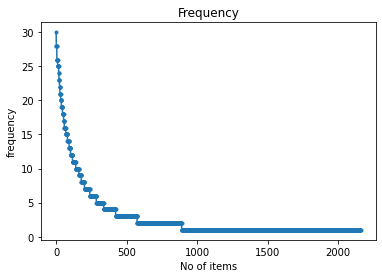

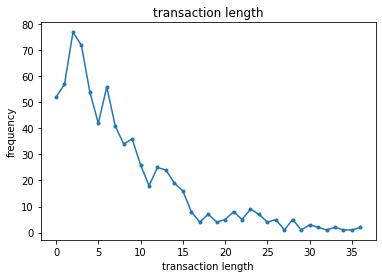

In [213]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


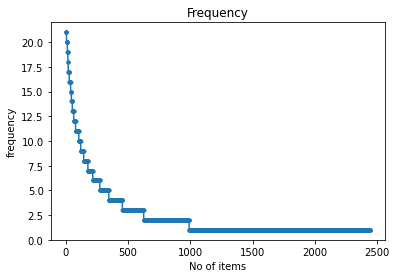

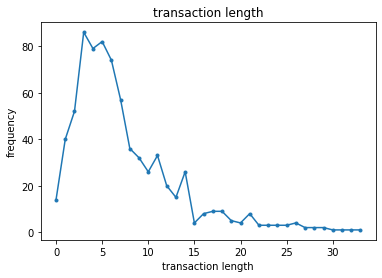

In [214]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

##### Mine the patterns with FPGrowth algorithm

In [221]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.02399754524230957


In [222]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
175,ever,28
176,would,28
177,will,28
178,go,28


In [223]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.016997814178466797


In [224]:
obj1.save('freq_patterns_not nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
175,ever,28
176,would,28
177,will,28
178,go,28


##### Finding the unique patterns in each sentiment

In [225]:
#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

In [226]:
# Display the final result
final_pattern_df

,Patterns,Support
127,will,28
126,would,28
125,ever,28
123,or,26
120,kid,26
...,...,...
142,handsome,9
143,perfect,9
144,ll,9
145,happy,9


In [227]:
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

Number of patterns discarded: 104


We observed a significant number of patterns that were common across different categories, which is why we chose to discard them. The next step is to integrate these now category-specific patterns into our data. How will we do this? By converting the patterns into binary data within the columns of our document-term matrix. Specifically, we will check each document for the presence of each pattern. If a pattern is found in the document, we'll mark it with a '1'; if it's not present, we'll mark it with a '0'. This binary encoding allows us to effectively augment our data, enhancing its utility for subsequent classification tasks.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,0000,0000001200,000001,000005102000,000043,0001,000100255pixel,00014,...,al scouts boy,et scouts boy,soc princeton scouts boy,soc al scouts boy,soc et scouts boy,princeton al scouts boy,princeton et scouts boy,al et scouts boy,soc princeton al scouts boy,swell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### integrate category-specific patterns into original data (term-document matrix)

In [228]:
# Convert 'comment' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['comment'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,please,though,wonder,person,sung,handsome,perfect,ll,happy,its
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Dimensionality Reduction

In [229]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

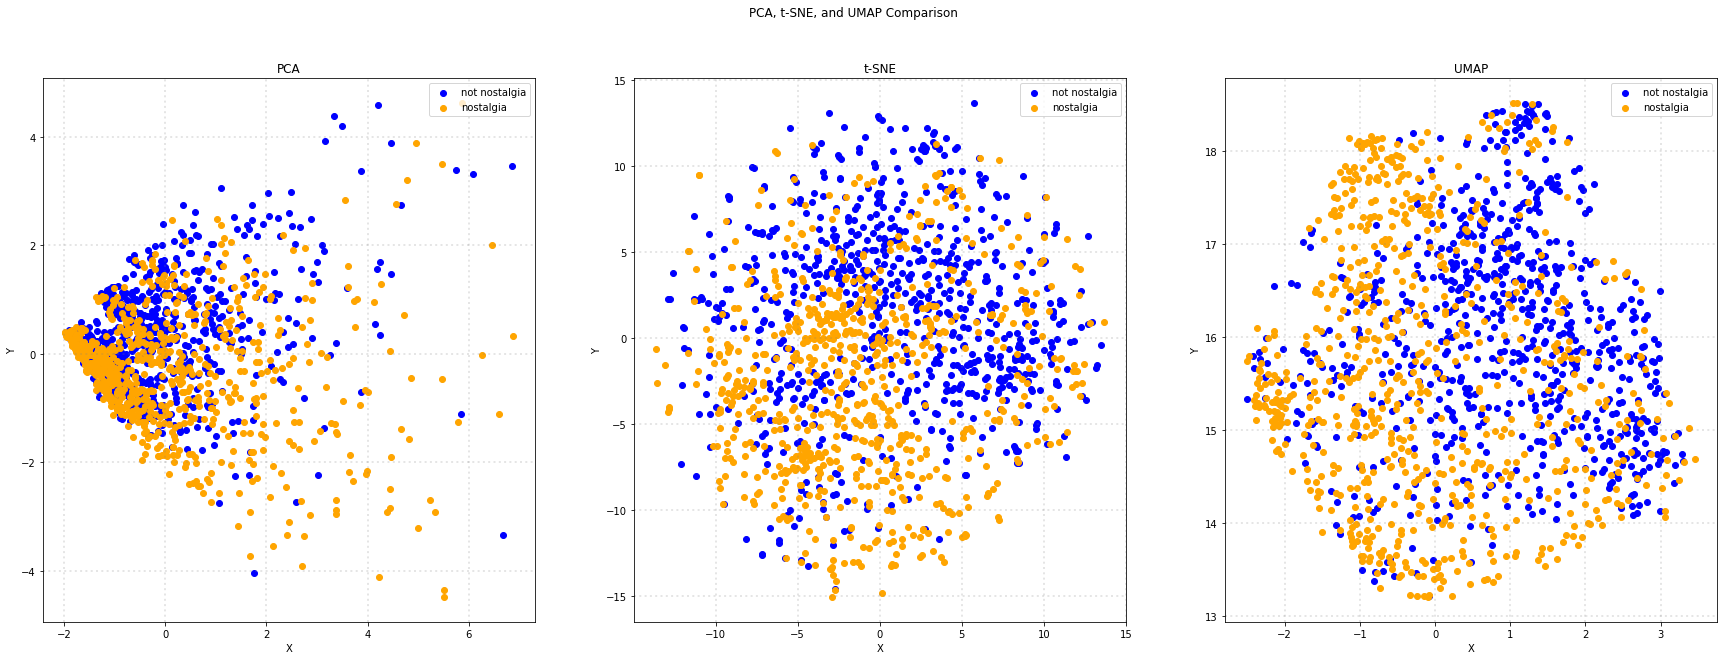

In [230]:
# Plot the results in subplots
col = ['blue', 'orange']
sentiments = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == sentiment].T[0]
        ys = X_reduced[X['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

##### Combine with the pattern augmented data:

In [231]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

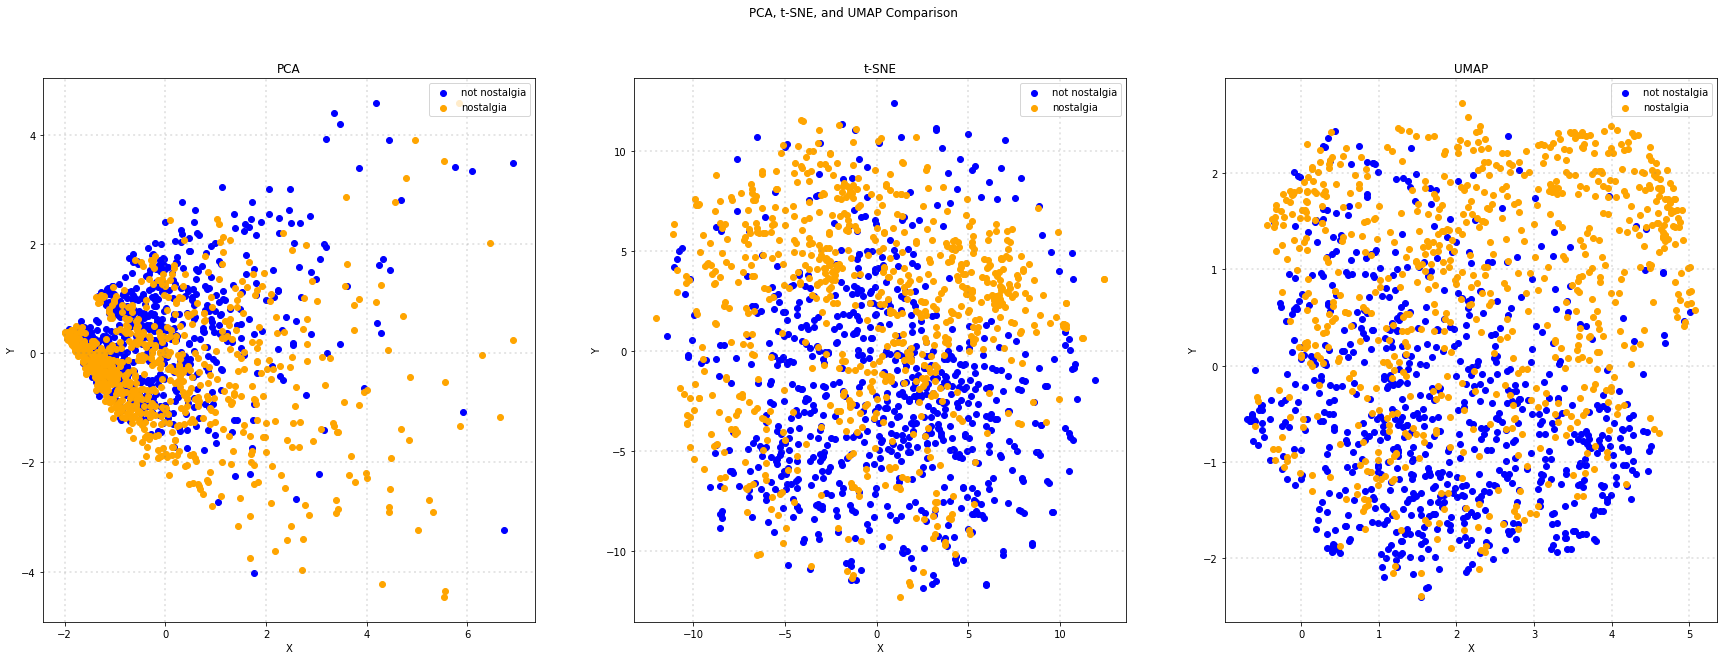

In [232]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

#### Discretization and Binarization


In [233]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)

X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()
X[0:9]

,sentiment,comment,unigrams,tokenized_comment,bin_sentiment
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t...","{at, golden, his, emotional, all, Jim, love, c...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene...","{his, listened, when, beautiful, love, a, sing...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{at, grow, 17., gentle, little, Always, comfor...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{song, me"", reality., tour, Viet, leave, came,...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","{him, songs, to, listening, of, his, me, playe...",[0]
5,nostalgia,"Every time I heard this song as a child, I use...","[Every, time, I, heard, this, song, as, a, chi...","{reminded, Now, song, fear, me, funerals., Jim...",[0]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...","[My, dad, loved, listening, to, Jim, Reeves, ,...","{me, loved, Jim, when, Time, things., for, tee...",[0]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{71, now, LISTENED, comes, his, me, childhood,...",[0]
8,not nostalgia,Wherever you are you always in my heart,"[Wherever, you, are, you, always, in, my, heart]","{always, in, you, Wherever, are, my, heart}",[1]


#### Data Exploration

In [240]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

The 3 random comments

In [241]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [242]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


##### Calculate Cosine Similarity

In [243]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0. 


#### Data Classification

##### Model with only the document-term frequency data

In [245]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to names
sentiment_mapping = {0: 'nostalgia', 1: 'not nostalgia'}

# Convert the numerical labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)

In [246]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8222    0.9528    0.8827       233
not nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



##### Model with the augmented data

In [247]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to names
sentiment_mapping = {0: 'nostalgia', 1: 'not nostalgia'}

# Convert the numerical labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment'], test_size=0.3, random_state=42)

In [248]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8644444444444445

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8185    0.9485    0.8787       233
not nostalgia     0.9333    0.7742    0.8463       217

     accuracy                         0.8644       450
    macro avg     0.8759    0.8613    0.8625       450
 weighted avg     0.8739    0.8644    0.8631       450



#### 3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
- Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    
- Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    
- Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


##### Word Cloud visualization (term frequency)

In [253]:
X['joined_tokens'] = X['unigrams'].apply(lambda x: " ".join(x))
X['joined_tokens'].head()

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs . Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
Name: joined_tokens, dtype: object

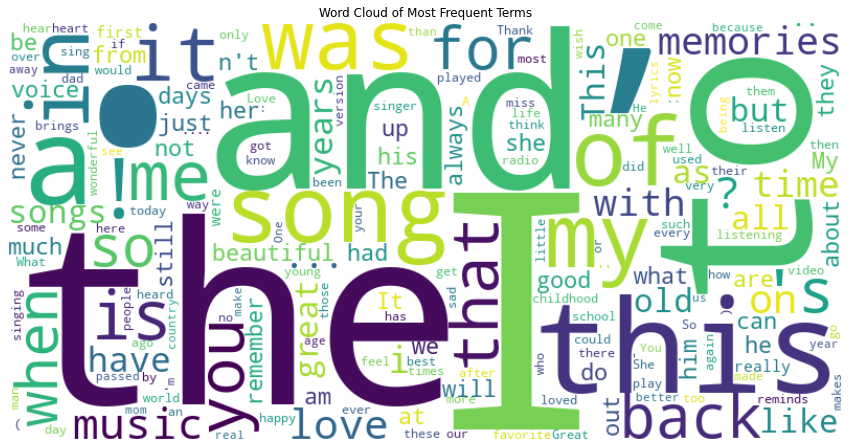

In [254]:
from wordcloud import WordCloud

from collections import Counter
# Combining all lyrics into a single string
all_unigrams = ' '.join(X['joined_tokens'])
# Split the string into words
all_words = all_unigrams.split()
# Counting the frequency of each word
word_counts = Counter(all_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.title('Word Cloud of Most Frequent Terms')
plt.show()

##### Generate TF-IDF features 

Ignore terms that appear in fewer than 2 documents  
Ignore terms that appear in more than 85% of documents    

-> For better visualization and interpretation

In [263]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 2: Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words="english")
# Ignore terms that appear in fewer than 2 documents
# Ignore terms that appear in more than 85% of documents

# Step 3: Transform the text data to TF-IDF features
tfidf_matrix= tfidf_vectorizer.fit_transform(X['joined_tokens'])

# tfidf_features is now a sparse matrix with TF-IDF features
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF features DataFrame
tfidf_df.head()

,10,100,11,12,13,14,15,16,17,18,...,wrong,wrote,year,years,yes,yesterday,young,younger,youth,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.224917,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.124459,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [264]:
# Check the shape of the resulting matrices
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

TF-IDF Matrix Shape: (1499, 586)


##### vectorizers to calculate df, tf 

Ignore terms that appear in fewer than 2 documents  
Ignore terms that appear in more than 85% of documents    

-> For better visualization and interpretation

In [265]:
# vectorizers to calculate df, tf 
df_vectorizer = CountVectorizer(max_df=0.8, min_df=5, stop_words="english", binary = True)
# Ignore terms that appear in fewer than 2 documents
# Ignore terms that appear in more than 85% of documents
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=5, stop_words="english", binary = False)

# Fit and transform the data
df_matrix = df_vectorizer.fit_transform(X['joined_tokens'])
tf_matrix = tf_vectorizer.fit_transform(X['joined_tokens'])

# Check the shape of the resulting matrices
print("DF Matrix Shape:", df_matrix.shape)
print("TF Matrix Shape:", tf_matrix.shape)

# Convert the TF  matrices to DataFrames for easier inspection
tf_df = pd.DataFrame(tf_matrix.toarray(), columns= tf_vectorizer.get_feature_names_out())

DF Matrix Shape: (1499, 586)
TF Matrix Shape: (1499, 586)


##### Calculate tf, df, idf

In [266]:
# Calculate Document Frequency
doc_freq = df_matrix.sum(axis=0).A1

# Calculate Document Frequency
word_freq = tf_matrix.sum(axis=0).A1

# Convert the result to a DataFrame for better readability
term_df = pd.DataFrame(
    data={'term': df_vectorizer.get_feature_names_out(),
        'df': doc_freq.tolist(),
        'counts': word_freq.tolist(),
        }
    )

term_df['idf'] = np.log(tf_matrix.shape[0] / term_df['df'])
# Calculate TF-IDF
term_df['tf-idf'] = term_df['counts'] * term_df['idf']

term_df = term_df.sort_values(by = "df", ascending=False).reset_index(drop = True)
# Display the Document Frequency DataFrame
term_df

,term,df,counts,idf,tf-idf
0,song,604,748,0.908979,679.916517
1,love,255,309,1.771290,547.328595
2,memories,231,244,1.870136,456.313132
3,music,212,267,1.955967,522.243249
4,time,185,213,2.092198,445.638104
...,...,...,...,...,...
581,second,5,5,5.703116,28.515578
582,seeing,5,5,5.703116,28.515578
583,july,5,5,5.703116,28.515578
584,senior,5,5,5.703116,28.515578


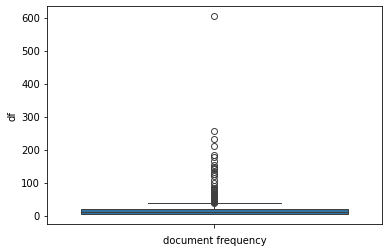

In [267]:
ax = sns.boxplot(y="df", data=term_df)
ax.set_xlabel("document frequency")
plt.show()

The box plot shows a right-skewed distribution of document frequencies, with most terms appearing in only a few documents,   
while a few common terms act as outliers with high frequencies across many documents.  

##### Rank terms by Tf-Idf weighting

In [268]:
#### Rank terms by Tf-Idf weighting
term_df = term_df.sort_values(by = "tf-idf", ascending=False).reset_index(drop = True)

term_df["tf-idf_ranking"] = term_df.index.to_frame() + 1
term_df["tf-idf_ranking_percent"] = term_df ["tf-idf_ranking"].apply(lambda x: x / term_df["tf-idf_ranking"].sum() * 100)
term_df["tf-idf_ranking_percent"] = term_df["tf-idf_ranking_percent"].cumsum(axis = 0)

term_df

,term,df,counts,idf,tf-idf,tf-idf_ranking,tf-idf_ranking_percent
0,song,604,748,0.908979,679.916517,1,0.000581
1,love,255,309,1.771290,547.328595,2,0.001744
2,music,212,267,1.955967,522.243249,3,0.003489
3,memories,231,244,1.870136,456.313132,4,0.005814
4,time,185,213,2.092198,445.638104,5,0.008721
...,...,...,...,...,...,...,...
581,loves,5,5,5.703116,28.515578,582,98.640627
582,bass,5,5,5.703116,28.515578,583,98.979598
583,million,5,5,5.703116,28.515578,584,99.319150
584,1970,5,5,5.703116,28.515578,585,99.659284


C:\Users\b0979\AppData\Local\Temp\ipykernel_5820\3840972636.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




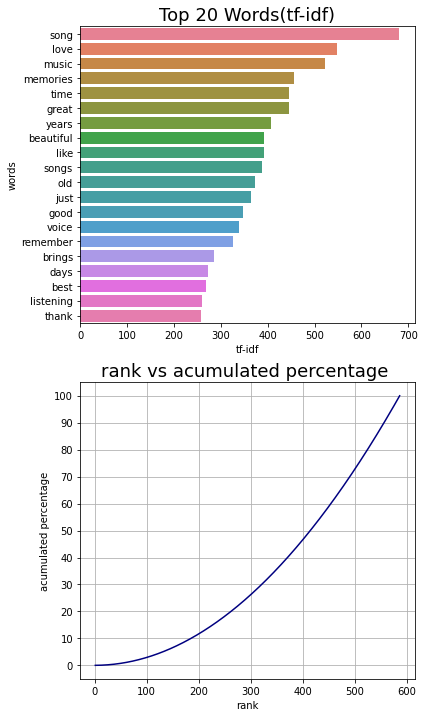

In [269]:
#以長條圖呈現
fig, ax = plt.subplots(nrows=2, ncols = 1, figsize=(6, 12))

sns.barplot(x ="tf-idf", y="term", data = term_df.head(20), ax = ax[0], palette="husl")

ax[0].set_title("Top 20 Words(tf-idf)", fontsize=18)
ax[0].set_xlabel("tf-idf")
ax[0].set_ylabel("words")

sns.lineplot(x = "tf-idf_ranking", y= "tf-idf_ranking_percent", data = term_df, ax=ax[1], color="navy")

ax[1].set_title("rank vs acumulated percentage ", fontsize=18)
ax[1].set_xlabel("rank")
ax[1].set_ylabel("acumulated percentage")
ax[1].set_yticks(np.arange(0, 110, 10))
ax[1].grid()

It suggest that while some categories have significantly higher values than others (as seen in the descending bar chart), there is an overall upward trend or growth pattern over time or magnitude (as shown in the line plot). This indicates both a concentration in certain high-value categories and an underlying growth trajectory.

##### Word Cloud visualization weighted by tf-idf

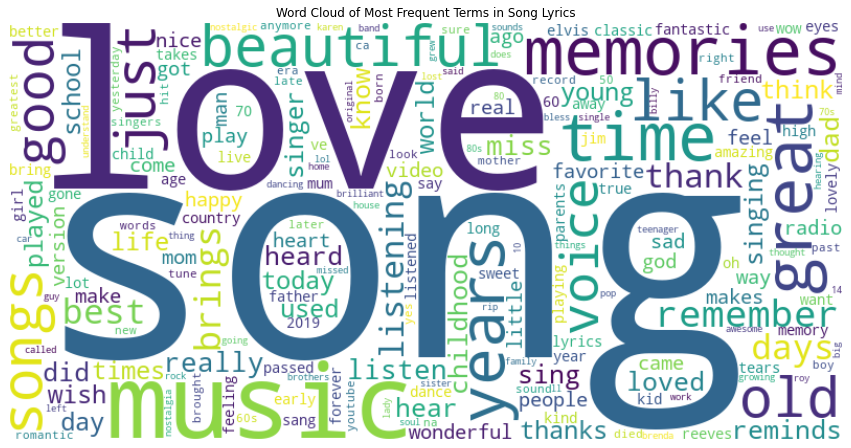

In [270]:
# Generate a word cloud
term_tfidf = pd.Series(data = term_df["tf-idf"])
term_tfidf.index =  term_df["term"]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_tfidf)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.title('Word Cloud of Most Frequent Terms in Song Lyrics')
plt.show()

After removing the stop words and weighted with Tf-Idf, the result looks much more meaningful and representative.

##### Naive Bayes  classificatoin

In [273]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X['comment'], X['sentiment'] , test_size=0.3, random_state=42)

# Vectorize text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Initialize MultinomialNB for TF-IDF features

In [274]:
# Initialize MultinomialNB for TF-IDF features
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

# Make predictions and evaluate for TF-IDF
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("TF-IDF Classifier Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Classification Report (TF-IDF):\n", classification_report(y_test, y_pred_tfidf))

TF-IDF Classifier Accuracy: 0.86
Classification Report (TF-IDF):
                precision    recall  f1-score   support

    nostalgia       0.81      0.95      0.88       233
not nostalgia       0.94      0.76      0.84       217

     accuracy                           0.86       450
    macro avg       0.87      0.86      0.86       450
 weighted avg       0.87      0.86      0.86       450



Word Frequency (Count) Features with Naive Bayes

In [275]:
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Initialize MultinomialNB for Word Count features
nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)

# Make predictions and evaluate for Word Count
y_pred_count = nb_count.predict(X_test_count)

print("Word Frequency Classifier Accuracy:", accuracy_score(y_test, y_pred_count))
print("Classification Report (Word Frequency):\n", classification_report(y_test, y_pred_count))

Word Frequency Classifier Accuracy: 0.8688888888888889
Classification Report (Word Frequency):
                precision    recall  f1-score   support

    nostalgia       0.82      0.95      0.88       233
not nostalgia       0.94      0.78      0.85       217

     accuracy                           0.87       450
    macro avg       0.88      0.87      0.87       450
 weighted avg       0.88      0.87      0.87       450



TF-IDF Features:
1. Vectorize the comments with TfidfVectorizer.
2. Use MultinomialNB on the TF-IDF features to train and predict sentiments.
3. Evaluate the classifier using accuracy and a classification report.


Word Frequency (Count) Features:
1. Vectorize the comments with CountVectorizer.
2. Use MultinomialNB on word count features.
3. Similarly, evaluate the classifier’s performance.

MultinomialNB is suitable for both TF-IDF and word frequency features in this case, since it’s effective with both counts and non-negative floating-point data.

#### 4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__

To improve the efficiency and meaningfulness of data preprocessing, I have these following reflections:

1. Stop-Words Removal: Removing stop-words directly in CountVectorizer will filter out common, non-informative words, allowing the analysis to focus on more meaningful terms.

2. TF-IDF Transformation: Using TF-IDF instead of raw term frequencies gives more weight to terms that are unique to individual documents, improving relevance by highlighting distinctive terms.

3. Automate Term and Document Selection: Automatically filter terms based on frequency thresholds and select documents with high densities of relevant terms to ensure consistent and accurate selection without manual effort.

4. Dimensionality Reduction: Applying techniques like Latent Semantic Analysis (LSA) or Principal Component Analysis (PCA) reduces the dimensionality of the term matrix, making it easier to visualize and interpret, especially with large vocabularies.

5. Selective Visualization of the Term-Document Matrix: Visualize only the top n terms and top m documents in heatmaps or charts to avoid the clutter of a full sparse matrix, making patterns in term usage clearer.

#### 5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__